In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [79]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
df.head()
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [65]:
df.koi_disposition[df.koi_disposition == 'CANDIDATE'] = 1
df.koi_disposition[df.koi_disposition == 'FALSE POSITIVE'] = 0
df.koi_disposition[df.koi_disposition == 'CONFIRMED'] = 0
df2 = df.koi_disposition.astype(float)
df2
target_names = ["Candidate", "Not"]

/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [76]:
X = df.drop("koi_disposition", axis=1)
y = df2
print(X.shape, y.shape)
print(y.dtype)
print(y.value_counts())

(6991, 40) (6991,)
float64
0.0    5304
1.0    1687
Name: koi_disposition, dtype: int64


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
3563              0              0              0              0   10.548413   
4099              0              0              0              0   24.754385   
5460              0              0              0              0    1.057336   
1091              0              0              0              0  201.118319   
5999              0              0              0              0   91.649983   

      koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
3563     5.470000e-05    -5.470000e-05   139.064020          0.004110   
4099     1.365000e-04    -1.365000e-04   140.207320          0.004460   
5460     1.230000e-07    -1.230000e-07   131.792007          0.000096   
1091     1.461000e-03    -1.461000e-03   187.569860          0.005290   
5999     3.181000e-03    -3.181000e-03   175.715600          0.028600   

      koi_time0bk_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
3563         -0.004110  ...            -133      4.387           0.066   
4099         -0.004460  ...            -144      4.519           0.078   
5460         -0.000096  ...            -140      4.594           0.054   
1091         -0.005290  ...            -112      4.447           0.072   
5999         -0.028600  ...            -233      4.145           0.164   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
3563          -0.123     1.092          0.181         -0.097  298.09543   
4099          -0.052     0.804          0.056         -0.076  295.73535   
5460          -0.027     0.683          0.054         -0.060  292.18417   
1091          -0.108     0.954          0.135         -0.083  283.11377   
5999          -0.164     1.608          0.905         -0.383  294.93198   

            dec  koi_kepmag  
3563  44.737061      13.204  
4099  42.576248      15.514  
5460  49.310040      15.414  
1091  48.131390      13.328  
5999  39.812420      12.964  

[5 rows x 40 columns]

In [68]:
model = ExtraTreesClassifier(n_estimators = 100, criterion ='entropy', max_features = 2, verbose = 3, random_state =1) 
model.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=None, max_features=2, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=3,
                     warm_start=False)

In [69]:
feature_importance = extra_tree_forest.feature_importances_ 

In [70]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0)

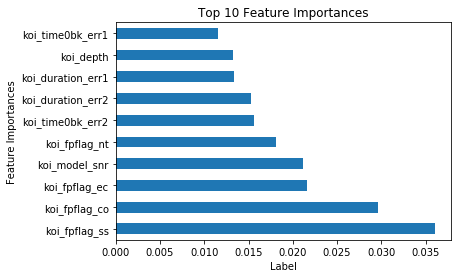

In [71]:
features= pd.Series(feature_importance_normalized, index=X.columns)
features.nlargest(10).plot(kind='barh')

plt.xlabel('Label') 
plt.ylabel('Feature Importances') 
plt.title('Top 10 Feature Importances') 
plt.show() 

In [72]:
clf = ExtraTreesClassifier(n_estimators=100, max_depth= None, min_samples_split=2,bootstrap=False, random_state=1)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores.mean()

0.9044564860426929

In [73]:
print("Average Cross Validation Score of ExtraTreesClassifier is 90%")


Average Cross Validation Score of ExtraTreesClassifier is 90%


In [74]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   Candidate       0.92      0.96      0.94      1344
         Not       0.85      0.70      0.77       404

    accuracy                           0.90      1748
   macro avg       0.88      0.83      0.85      1748
weighted avg       0.90      0.90      0.90      1748



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
